<a href="https://colab.research.google.com/github/AlishaJoy/SAR_de-speckling_angstromers/blob/main/UNET_trial_cgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

unet takes an image as an input and denoises it

Saving S1A_IW_GRDH_1SDV_20240713T004836_20240713T004901_054735_06AA12_32E0_COG_RGB.png to S1A_IW_GRDH_1SDV_20240713T004836_20240713T004901_054735_06AA12_32E0_COG_RGB (2).png
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0885
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - loss: 0.0847
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - loss: 0.0779
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step - loss: 0.0744
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - loss: 0.0691
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step - loss: 0.0653
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step - loss: 0.0575
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0486
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step - loss: 0.0580
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - loss: 0.0520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


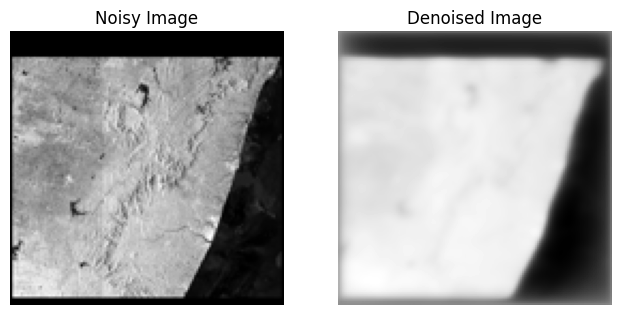

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import files
from PIL import Image

# U-Net model definition
def unet_model(input_size=(128, 128, 1)):
    inputs = layers.Input(input_size)

    # Downsampling
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)

    # Upsampling
    u5 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c4), c3])
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c5), c2])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c6), c1])
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Load and preprocess a single image
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((128, 128))  # Resize for the model
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    return img_array.reshape(-1, 128, 128, 1)

# Upload an image file
uploaded = files.upload()

# Assume only one image is uploaded
image_path = next(iter(uploaded.keys()))
noisy_image = load_and_preprocess_image(image_path)

# Build U-Net model
model = unet_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Prepare training data (for demonstration, using the noisy image as both input and target)
X_train = noisy_image
Y_train = noisy_image  # In practice, you would use clean images for training

# Train the model (for demonstration, we will fit the model on the same noisy image)
model.fit(X_train, Y_train, epochs=10, batch_size=1)

# Denoise the noisy image
denoised_image = model.predict(noisy_image)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.show()


UNET MAKING ONE IMAGE AND ADDING SPECKLES THEN DESPECKLING

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.2513
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2450
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step - loss: 0.2428
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - loss: 0.2319
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - loss: 0.2072
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - loss: 0.1753
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - loss: 0.1182
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step - loss: 0.0670
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - loss: 0.0408
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0206
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


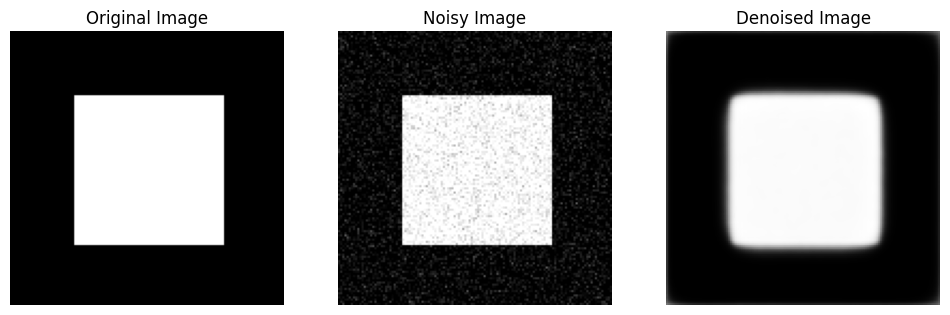

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# U-Net model definition
def unet_model(input_size=(128, 128, 1)):
    inputs = layers.Input(input_size)

    # Downsampling
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)

    # Upsampling
    u5 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c4), c3])
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c5), c2])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c6), c1])
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Load and preprocess example data (create a noisy image for demonstration)
def create_noisy_image():
    # Create a simple grayscale image
    image = np.zeros((128, 128))
    image[30:100, 30:100] = 1  # Add a square in the middle
    noise = np.random.normal(0, 0.1, image.shape)  # Add Gaussian noise
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 1)  # Clip to valid range
    return image, noisy_image

# Prepare data
original_image, noisy_image = create_noisy_image()
X_train = noisy_image.reshape(-1, 128, 128, 1)  # Reshape for model input
Y_train = original_image.reshape(-1, 128, 128, 1)  # Ground truth (original image)

# Build U-Net model
model = unet_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (in a real scenario, you would use a larger dataset)
model.fit(X_train, Y_train, epochs=10, batch_size=1)

# Denoise the noisy image
denoised_image = model.predict(X_train)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Denoised Image")
plt.imshow(denoised_image[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.show()


UNET THAT TAKES IN A ZIP FILE WITH IMAGES AS AN INPUT

Saving S1A_IW_GRDH_1SDV_20240713T004836_20240713T004901_054735_06AA12_32E0_COG_RGB.zip to S1A_IW_GRDH_1SDV_20240713T004836_20240713T004901_054735_06AA12_32E0_COG_RGB.zip
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 497ms/step - loss: 0.0897
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - loss: 0.0948
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step - loss: 0.0728
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 874ms/step - loss: 0.0660
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 879ms/step - loss: 0.0564
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - loss: 0.0479
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - loss: 0.0676
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - loss: 0.0345
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 518ms/step - loss: 0.0198
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 811ms/step - loss: 0.0161
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


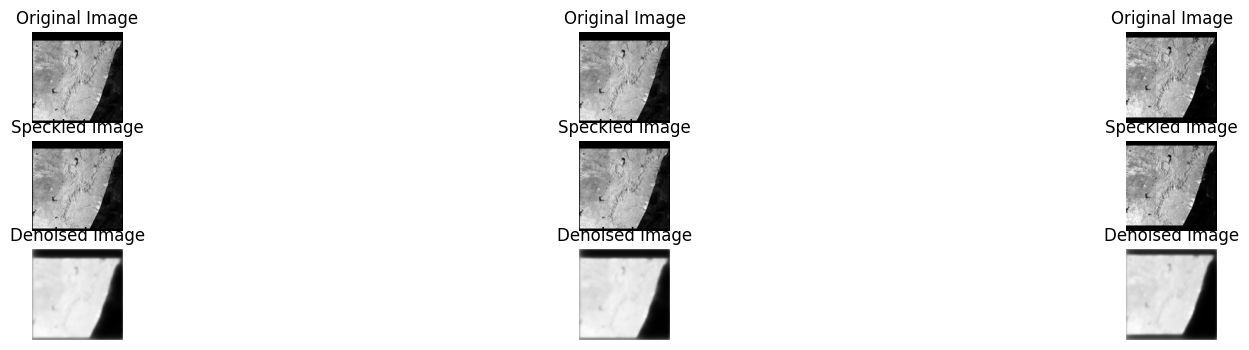

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import zipfile
from google.colab import files
from PIL import Image

# Step 1: Upload the zip file containing speckled images
uploaded = files.upload()

# Extract the uploaded zip file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('uploaded_images')

# Step 2: Load and preprocess the images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith('.png') or img_path.endswith('.jpg') or img_path.endswith('.tif'):
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((128, 128))  # Resize for the model
            images.append(np.array(img) / 255.0)  # Normalize to [0, 1]
    return np.array(images)

# Load images from the extracted folder
speckled_images = load_images_from_folder('uploaded_images')

# Step 3: Create corresponding original images (for demo purposes, we will use the noisy images)
original_images = speckled_images.copy()  # Here, you would typically load the original clean images

# Reshape for the model input
X_train = speckled_images.reshape(-1, 128, 128, 1)
Y_train = original_images.reshape(-1, 128, 128, 1)

# U-Net model definition
def unet_model(input_size=(128, 128, 1)):
    inputs = layers.Input(input_size)

    # Downsampling
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)

    # Upsampling
    u5 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c4), c3])
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c5), c2])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Concatenate()([layers.UpSampling2D((2, 2))(c6), c1])
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Build U-Net model
model = unet_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=1)

# Step 5: Denoise the images
denoised_images = model.predict(X_train)

# Display results for a few images
n_display = min(5, len(speckled_images))
plt.figure(figsize=(20, 4))
for i in range(n_display):
    plt.subplot(3, n_display, i + 1)
    plt.title("Original Image")
    plt.imshow(original_images[i], cmap='gray')
    plt.axis('off')

    plt.subplot(3, n_display, i + 1 + n_display)
    plt.title("Speckled Image")
    plt.imshow(speckled_images[i], cmap='gray')
    plt.axis('off')

    plt.subplot(3, n_display, i + 1 + 2 * n_display)
    plt.title("Denoised Image")
    plt.imshow(denoised_images[i].reshape(128, 128), cmap='gray')
    plt.axis('off')

plt.show()
